<a href="https://colab.research.google.com/github/OmdenaAI/berlin-germany-predicting-train-delays/blob/main/tasks/task-2-data-exploration/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

# to access files on GDrive
from google.colab import drive
drive.mount('/content/drive')

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)


Mounted at /content/drive


In [2]:
### NOTE: Steps to obtain the link to the path in the cell below, in case it doesn't work:
#   - The previous cell should have mounted the drive and asked you to approve access to your Gdrive
#   - In Colab, navigate through the folder structure and locate it. If it does not appear, add a shortcut in your Drive to the Shared folder "German Train Delays". This will make it appear, as shown below.
#   - Right-click on the parquet file and select "Copy path". Paste in the cell below

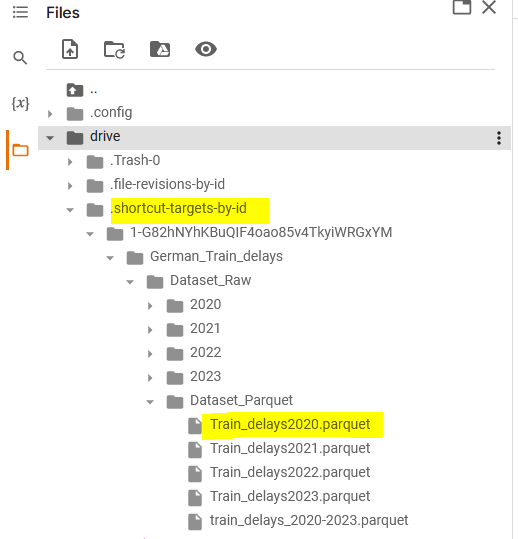

In [3]:
# paths to parquet file stored on shared drive
# path_full contains the full dataset (2020-2023). It is commented because due to its size, it crashes

# path_full = "/content/drive/.shortcut-targets-by-id/1-G82hNYhKBuQIF4oao85v4TkyiWRGxYM/German_Train_delays/Dataset_Raw/Dataset_Parquet/train_delays_2020-2023.parquet"
path_2020 = "/content/drive/.shortcut-targets-by-id/1-G82hNYhKBuQIF4oao85v4TkyiWRGxYM/German_Train_delays/Dataset_Raw/Dataset_Parquet/Train_delays2020.parquet"
df = pd.read_parquet(path_2020)


# 1 Understanding the big picture

##Columns

Let's have a look to the columns in this dataset and the information they contain:

* DATDEP - Date of departure 
* TRAIN_NO - Train number 
* RELATION - Relation 
* TRAIN_SERV - Railway operator 
* PTCAR_NO - Measuring point number 
* LINE_NO_DEP - Departure line 
* REAL_TIME_ARR - Actual arrival time 
* REAL_TIME_DEP - Actual departure time 
* PLANNED_TIME_ARR - Planned arrival time 
* PLANNED_TIME_DEP - Planned departure time 
* DELAY_ARR - Delay at arrival 
* DELAY_DEP - Delay at departure 
* RELATION_DIRECTION - Relation direction 
* PTCAR_LG_NM_NL - Stopping place 
* LINE_NO_ARR - Arrival line 
* PLANNED_DATE_ARR - Planned arrival date 
* PLANNED_DATE_DEP - Planned departure date 
* REAL_DATE_ARR - Actual arrival date 
* REAL_DATE_DEP - Actual departure date

In total, we have 19 columns:

In [4]:
df.shape

(17717432, 19)

# Target fields
In this exercise we want to be able to predict the delays in the arrival of trains. Therefore, we have two columns with potential targets:
```
DELAY_ARR 
DELAY_DEP
```

## Type of data
Let's use 'head' and 'info' to understand the types of data

In [5]:
df.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,DELAY_ARR,DELAY_DEP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01JAN2020,115,IC 33,SNCB/NMBS,477,42,14:32:56,14:39:11,14:34:00,14:39:00,-64.0,11.0,IC 33: LUXEMBOURG -> LIERS,GOUVY,42,01JAN2020,01JAN2020,01JAN2020,01JAN2020
1,01JAN2020,115,IC 33,SNCB/NMBS,1185,42,14:48:15,14:49:12,14:49:00,14:49:00,-45.0,12.0,IC 33: LUXEMBOURG -> LIERS,VIELSALM,42,01JAN2020,01JAN2020,01JAN2020,01JAN2020
2,01JAN2020,115,IC 33,SNCB/NMBS,1157,42,14:59:42,15:01:05,15:00:00,15:01:00,-18.0,5.0,IC 33: LUXEMBOURG -> LIERS,TROIS-PONTS,42,01JAN2020,01JAN2020,01JAN2020,01JAN2020
3,01JAN2020,115,IC 33,SNCB/NMBS,992,42,15:04:05,15:05:09,15:04:00,15:04:00,5.0,69.0,IC 33: LUXEMBOURG -> LIERS,COO,42,01JAN2020,01JAN2020,01JAN2020,01JAN2020
4,01JAN2020,115,IC 33,SNCB/NMBS,1110,42,15:13:09,15:13:09,15:12:00,15:12:00,69.0,69.0,IC 33: LUXEMBOURG -> LIERS,STOUMONT,42,01JAN2020,01JAN2020,01JAN2020,01JAN2020


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717432 entries, 0 to 1909380
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DATDEP              object 
 1   TRAIN_NO            int64  
 2   RELATION            object 
 3   TRAIN_SERV          object 
 4   PTCAR_NO            int64  
 5   LINE_NO_DEP         object 
 6   REAL_TIME_ARR       object 
 7   REAL_TIME_DEP       object 
 8   PLANNED_TIME_ARR    object 
 9   PLANNED_TIME_DEP    object 
 10  DELAY_ARR           float64
 11  DELAY_DEP           float64
 12  RELATION_DIRECTION  object 
 13  PTCAR_LG_NM_NL      object 
 14  LINE_NO_ARR         object 
 15  PLANNED_DATE_ARR    object 
 16  PLANNED_DATE_DEP    object 
 17  REAL_DATE_ARR       object 
 18  REAL_DATE_DEP       object 
dtypes: float64(2), int64(2), object(15)
memory usage: 2.6+ GB


Notes for potential data transformation:
* The following 4 columns can be transformed into a Time object:
```
REAL_TIME_ARR
REAL_TIME_DEP
PLANNED_TIME_ARR
PLANNED_TIME_DEP    
```
     
* The following columns can be transformed into a Date object:
```
DATDEP              
PLANNED_DATE_ARR 	
PLANNED_DATE_DEP 	
REAL_DATE_ARR 	
REAL_DATE_DEP  
```

* The following columns are candidates to have categorical values:
```
TRAIN_NO 	
RELATION 	
TRAIN_SERV
```




Check if there are some values missing:

In [7]:
df.isna().sum()

DATDEP                      0
TRAIN_NO                    0
RELATION                    0
TRAIN_SERV                  0
PTCAR_NO                    0
LINE_NO_DEP            888200
REAL_TIME_ARR          883076
REAL_TIME_DEP          882062
PLANNED_TIME_ARR       883076
PLANNED_TIME_DEP       882061
DELAY_ARR              883071
DELAY_DEP              882057
RELATION_DIRECTION    1142029
PTCAR_LG_NM_NL              0
LINE_NO_ARR            889233
PLANNED_DATE_ARR       883076
PLANNED_DATE_DEP       882061
REAL_DATE_ARR          883076
REAL_DATE_DEP          882062
dtype: int64

Statistical information of the dataset:
- The average delay is of 87 seconds
- The maximum delay in this year is 30495 seconds (~8.5h). To verify if this is an outlier.


In [8]:
df.describe()

,TRAIN_NO,PTCAR_NO,DELAY_ARR,DELAY_DEP
count,1.771743e+07,1.771743e+07,1.683436e+07,1.683538e+07
mean,3.481417e+03,6.320272e+02,8.712479e+01,9.137424e+01
std,2.503513e+03,4.048869e+02,3.288609e+02,3.210509e+02
min,1.000000e+01,6.000000e+00,-8.671600e+04,-8.671600e+04
25%,1.985000e+03,2.550000e+02,-1.400000e+01,-4.000000e+00
50%,3.067000e+03,6.010000e+02,2.500000e+01,2.800000e+01
75%,4.312000e+03,9.190000e+02,9.900000e+01,9.800000e+01
max,1.998500e+04,2.089000e+03,3.049500e+04,2.838000e+04


# 2 Dataset preparation

General questions to answer:
*    are there any useless or redundant variables?
*    are there any duplicate columns?
*    does the nomenclature make sense?
*    are there any new variables we want to create?

Are there any useless or redundant variables?
- Do we need the line in which trains depart and arrive? (LINE_NO_DEP, LINE_NO_ARR)
- There seems to be some duplication in Columns RELATION and RELATION_DIRECTION


Before we identified three potential candidates to contain categorical values. Let's check them:

In [9]:
print(len(df['TRAIN_NO'].unique()))


5736


In [10]:
df_trainno = df["TRAIN_NO"].value_counts()

print(df_trainno)

3816     17283
3841     17190
3840     17139
3819     17117
3817     17115
         ...  
18793        1
18891        1
18531        1
18504        1
18791        1
Name: TRAIN_NO, Length: 5736, dtype: int64


<AxesSubplot:xlabel='TRAIN_NO', ylabel='Count'>

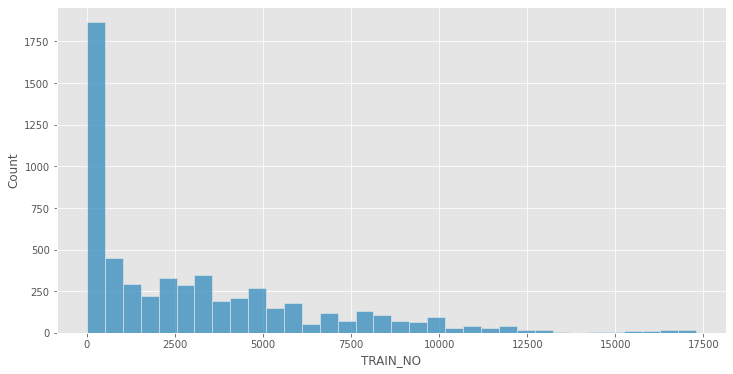

In [11]:
sns.histplot(data=df_trainno)


In [12]:
df["RELATION"].value_counts()

P          800841
IC 25      582266
IC 16-1    580438
IC 01      478065
IC 18      411708
            ...  
IC 42        3110
INT          1917
L A4-1       1208
IZY           540
CHARTER       136
Name: RELATION, Length: 112, dtype: int64

In [13]:
df["TRAIN_SERV"].value_counts()

SNCB/NMBS     17616886
THI-FACT         85821
EUROSTARFR       14725
Name: TRAIN_SERV, dtype: int64

Summary:
- TRAIN_SERV will be transformed into a categorical column
- RELATION contains 112 different values - tbd if it makes sense
- TRAIN_NO contains 5736 unique values


##3 Data Cleaning

In [14]:
df.isna().sum()

DATDEP                      0
TRAIN_NO                    0
RELATION                    0
TRAIN_SERV                  0
PTCAR_NO                    0
LINE_NO_DEP            888200
REAL_TIME_ARR          883076
REAL_TIME_DEP          882062
PLANNED_TIME_ARR       883076
PLANNED_TIME_DEP       882061
DELAY_ARR              883071
DELAY_DEP              882057
RELATION_DIRECTION    1142029
PTCAR_LG_NM_NL              0
LINE_NO_ARR            889233
PLANNED_DATE_ARR       883076
PLANNED_DATE_DEP       882061
REAL_DATE_ARR          883076
REAL_DATE_DEP          882062
dtype: int64

In [15]:
df = df.dropna(subset=['RELATION_DIRECTION', 'LINE_NO_DEP', 'REAL_TIME_ARR', 'LINE_NO_ARR'])

In [16]:
df.isna().sum()

DATDEP                0
TRAIN_NO              0
RELATION              0
TRAIN_SERV            0
PTCAR_NO              0
LINE_NO_DEP           0
REAL_TIME_ARR         0
REAL_TIME_DEP         0
PLANNED_TIME_ARR      0
PLANNED_TIME_DEP      0
DELAY_ARR             0
DELAY_DEP             0
RELATION_DIRECTION    0
PTCAR_LG_NM_NL        0
LINE_NO_ARR           0
PLANNED_DATE_ARR      0
PLANNED_DATE_DEP      0
REAL_DATE_ARR         0
REAL_DATE_DEP         0
dtype: int64


Data Transformation (from John Jomari Arubio's notebook https://github.com/OmdenaAI/berlin-germany-predicting-train-delays/blob/main/src/tasks/task-2-data-exploration/EDA%20February%202022.ipynb)

    The following 4 columns can be transformed from object into Time dtype:

      REAL_TIME_ARR, REAL_TIME_DEP, PLANNED_TIME_ARR, PLANNED_TIME_DEP

    The following columns can be transformed into a Date object:

      DATDEP, PLANNED_DATE_ARR, PLANNED_DATE_DEP, REAL_DATE_ARR, REAL_DATE_DEP 

    The following columns are candidates to have categorical values:

      TRAIN_NO, RELATION, TRAIN_SERV



In [17]:
#converting the object type to Hour:Minute:Second datetime type
df.REAL_TIME_ARR = pd.to_datetime(df.REAL_TIME_ARR, format='%H:%M:%S').dt.time
df.REAL_TIME_DEP = pd.to_datetime(df.REAL_TIME_DEP, format='%H:%M:%S').dt.time
df.PLANNED_TIME_ARR = pd.to_datetime(df.PLANNED_TIME_ARR, format='%H:%M:%S').dt.time
df.PLANNED_TIME_DEP = pd.to_datetime(df.PLANNED_TIME_DEP, format='%H:%M:%S').dt.time

In [18]:
#converting the object type (01FEB2022) to %d%b%Y (2022-02-01) datetime type
df.DATDEP = pd.to_datetime(df.DATDEP, format='%d%b%Y')
df.PLANNED_DATE_ARR = pd.to_datetime(df.PLANNED_DATE_ARR, format="%d%b%Y")
df.PLANNED_DATE_DEP = pd.to_datetime(df.PLANNED_DATE_DEP, format="%d%b%Y")
df.REAL_DATE_ARR = pd.to_datetime(df.REAL_DATE_ARR, format='%d%b%Y')
df.REAL_DATE_DEP = pd.to_datetime(df.REAL_DATE_DEP, format='%d%b%Y')

In [19]:
#converting some types to a object to categorical type, since categorical consumes less memory
df.TRAIN_NO = pd.Categorical(df.TRAIN_NO)
df.RELATION = pd.Categorical(df.RELATION)
df.TRAIN_SERV = pd.Categorical(df.TRAIN_SERV)

Also from John Jomari Arubio's notebook https://github.com/OmdenaAI/berlin-germany-predicting-train-delays/blob/main/src/tasks/task-2-data-exploration/EDA%20February%202022.ipynb


---

I think for the df.RELATION_DIRECTION value example "IC 32: KORTRIJK -> BRUGGE"

    We need to remove the IC 32 since that is already found in the df.RELATION column.
    We need to create a new column name "ORIGIN" for "KORTRIJK"
    We need to create a new column name "DESTINATION" for BRUGGE
    We need to know the day of the week, I believe this might be a good indicator for a delays in train

Based on my research it seems like PTCAR_LG_NM_NL is the station/s before the destination. So some has only one, and a greated distance will have more stations. I believe greater distance train travel is more susceptible in train delays

---





In [20]:
#Remove the strings before ":" 
df['RELATION_DIRECTION'] = df['RELATION_DIRECTION'].str.split(': ').str[1]


In [21]:
#Creating new variable 'ORIGIN'
df['ORIGIN'] = df['RELATION_DIRECTION'].str.split(' ->').str[0]



In [22]:
#Creating new variable 'DESTINATION'
df['DESTINATION'] = df['RELATION_DIRECTION'].str.split( "> ").str[1]

In [ ]:
# dropping the RELATION_DIRECTION for now
df = df.drop("RELATION_DIRECTION", axis=1)

#Creating new variable DAY_OF_THE_WEEK 
df["DAY_OF_THE_WEEK"] = df["REAL_DATE_ARR"].apply(lambda x: x.strftime("%A"))

#Creating new variable DELAYED to visualize the data clearly
df['DELAYED'] = df.DELAY_ARR.apply(lambda x: x > 0)

In [24]:
df.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,...,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP,ORIGIN,DESTINATION,DAY_OF_THE_WEEK,DELAYED
0,2020-01-01,115,IC 33,SNCB/NMBS,477,42,14:32:56,14:39:11,14:34:00,14:39:00,...,GOUVY,42,2020-01-01,2020-01-01,2020-01-01,2020-01-01,LUXEMBOURG,LIERS,Wednesday,False
1,2020-01-01,115,IC 33,SNCB/NMBS,1185,42,14:48:15,14:49:12,14:49:00,14:49:00,...,VIELSALM,42,2020-01-01,2020-01-01,2020-01-01,2020-01-01,LUXEMBOURG,LIERS,Wednesday,False
2,2020-01-01,115,IC 33,SNCB/NMBS,1157,42,14:59:42,15:01:05,15:00:00,15:01:00,...,TROIS-PONTS,42,2020-01-01,2020-01-01,2020-01-01,2020-01-01,LUXEMBOURG,LIERS,Wednesday,False
3,2020-01-01,115,IC 33,SNCB/NMBS,992,42,15:04:05,15:05:09,15:04:00,15:04:00,...,COO,42,2020-01-01,2020-01-01,2020-01-01,2020-01-01,LUXEMBOURG,LIERS,Wednesday,True
4,2020-01-01,115,IC 33,SNCB/NMBS,1110,42,15:13:09,15:13:09,15:12:00,15:12:00,...,STOUMONT,42,2020-01-01,2020-01-01,2020-01-01,2020-01-01,LUXEMBOURG,LIERS,Wednesday,True


There are still some uncategorized columns. Let's fix that, starting with the train LINES

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998480 entries, 0 to 1909377
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DATDEP            datetime64[ns]
 1   TRAIN_NO          category      
 2   RELATION          category      
 3   TRAIN_SERV        category      
 4   PTCAR_NO          int64         
 5   LINE_NO_DEP       object        
 6   REAL_TIME_ARR     object        
 7   REAL_TIME_DEP     object        
 8   PLANNED_TIME_ARR  object        
 9   PLANNED_TIME_DEP  object        
 10  DELAY_ARR         float64       
 11  DELAY_DEP         float64       
 12  PTCAR_LG_NM_NL    object        
 13  LINE_NO_ARR       object        
 14  PLANNED_DATE_ARR  datetime64[ns]
 15  PLANNED_DATE_DEP  datetime64[ns]
 16  REAL_DATE_ARR     datetime64[ns]
 17  REAL_DATE_DEP     datetime64[ns]
 18  ORIGIN            object        
 19  DESTINATION       object        
 20  DAY_OF_THE_WEEK   category      
 21  DELAYED

In [42]:
print(df['LINE_NO_DEP'].unique())

['42' '43' '34' '34L/1' '37A' '75' '108' '112' '116' '117' '96' '0/5' '25'
 '36' '0/4' '36C' '60' '50' '0/2' '50C' '139' '139L/2' '35' '0/6' '0/1'
 '57' '21A' '21' '36N' '50A' '90' '123' '94' '27' '0/3' '124L/3' '124'
 '19' '15' '50E' '58/1' '58' '59' '59/1' '26' '161A' '130A' '130' '140'
 '140/1' '50A/6' '50D' '125' '75A' '78' '97' '118' '124A' '37' '2' '122'
 '26/4' '3' '54' '89' '29' '66' '50F' '130B' '51' '51B' '73' '28(1)' '28'
 '16' '96E' '132' '134' '53' '21/1' '96N' '161' '96A' '154' '161/2' '162'
 '12' '52' '51A' '1' '40' '165' '165(1)' '4' '86' '125A' '69' '44' '50A/5'
 '166' '49' '27A' '90C' '97L/1' '26/2' '13' '27D/4' '27B' '130C' '167'
 '36/2' '27D' '35L/3' '37L/1' '50L/4' '53A' '28/4' '124L/2' '51L/2'
 '130L/3' '27L/1' '130L/8' '50A/3' '59B' '130D' '35L/1' '35/1' '139L/1'
 '59A' '51L/1' '28L/1' '130/1' '144' '125L/1' '58/2' '27D/5' '130L/4'
 '24/1' '24' '27F' '28L/2' '75L/1' '50L/2' '50L/5' '10' '147' '125L/2'
 '37L/2' '50L/3' '130L/2' '39' '96B' '125L/4' '27E/1' '26B' '2

In [40]:
print(len(df['LINE_NO_DEP'].unique()))

159


In [35]:
#converting DAY_OF_THE_WEEK to a object to categorical type
df["DAY_OF_THE_WEEK"]  = pd.Categorical(df["DAY_OF_THE_WEEK"] )

In [45]:
df["LINE_NO_DEP"] = pd.Categorical(df["LINE_NO_DEP"])

In [46]:
df["LINE_NO_ARR"] = pd.Categorical(df["LINE_NO_ARR"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998480 entries, 0 to 1909377
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DATDEP            datetime64[ns]
 1   TRAIN_NO          category      
 2   RELATION          category      
 3   TRAIN_SERV        category      
 4   PTCAR_NO          int64         
 5   LINE_NO_DEP       category      
 6   REAL_TIME_ARR     object        
 7   REAL_TIME_DEP     object        
 8   PLANNED_TIME_ARR  object        
 9   PLANNED_TIME_DEP  object        
 10  DELAY_ARR         float64       
 11  DELAY_DEP         float64       
 12  PTCAR_LG_NM_NL    object        
 13  LINE_NO_ARR       category      
 14  PLANNED_DATE_ARR  datetime64[ns]
 15  PLANNED_DATE_DEP  datetime64[ns]
 16  REAL_DATE_ARR     datetime64[ns]
 17  REAL_DATE_DEP     datetime64[ns]
 18  ORIGIN            object        
 19  DESTINATION       object        
 20  DAY_OF_THE_WEEK   category      
 21  DELAYED

<AxesSubplot:xlabel='LINE_NO_ARR', ylabel='DELAY_ARR'>

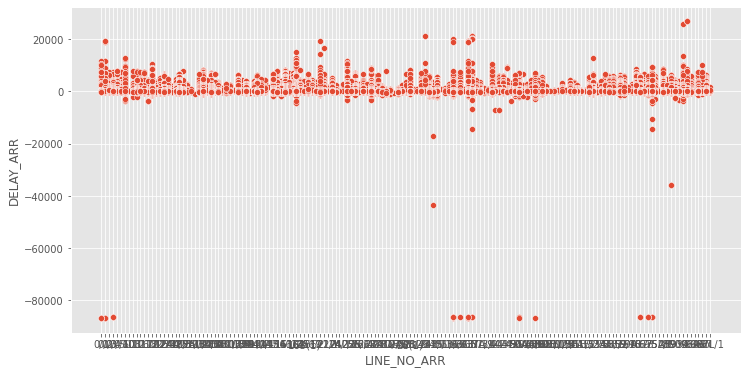

In [49]:
sns.scatterplot(x="LINE_NO_ARR", y="DELAY_ARR", data=df)

<AxesSubplot:>

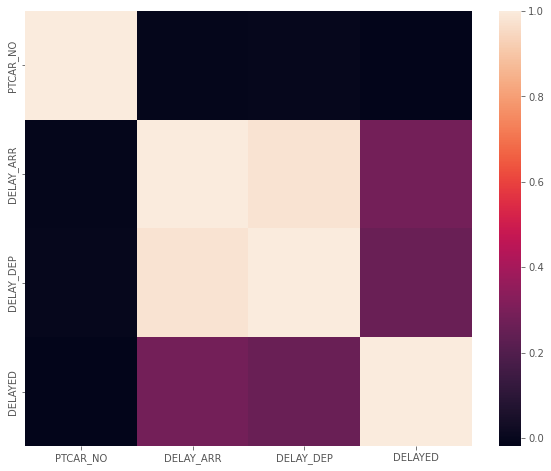

In [48]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
TRAIN_SNCB = df[df["TRAIN_SERV"] == "SNCB/NMBS"]
TRAIN_SNCB.shape

(14905508, 22)

<AxesSubplot:>

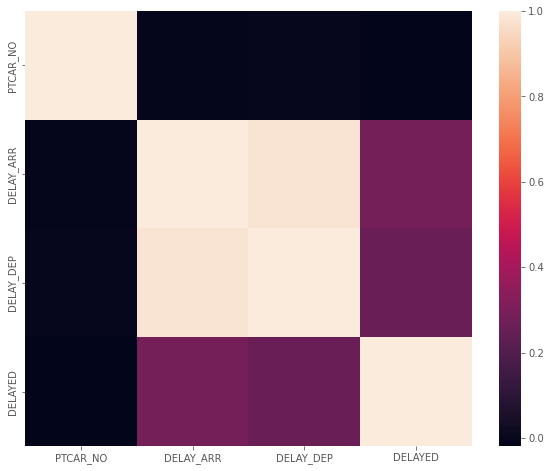

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
corr = TRAIN_SNCB.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
print(corr)

           PTCAR_NO  DELAY_ARR  DELAY_DEP   DELAYED
PTCAR_NO   1.000000  -0.006574  -0.004284 -0.018202
DELAY_ARR -0.006574   1.000000   0.978793  0.285685
DELAY_DEP -0.004284   0.978793   1.000000  0.259024
DELAYED   -0.018202   0.285685   0.259024  1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998480 entries, 0 to 1909377
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   DATDEP            datetime64[ns]
 1   TRAIN_NO          category      
 2   RELATION          category      
 3   TRAIN_SERV        category      
 4   PTCAR_NO          int64         
 5   LINE_NO_DEP       object        
 6   REAL_TIME_ARR     object        
 7   REAL_TIME_DEP     object        
 8   PLANNED_TIME_ARR  object        
 9   PLANNED_TIME_DEP  object        
 10  DELAY_ARR         float64       
 11  DELAY_DEP         float64       
 12  PTCAR_LG_NM_NL    object        
 13  LINE_NO_ARR       object        
 14  PLANNED_DATE_ARR  datetime64[ns]
 15  PLANNED_DATE_DEP  datetime64[ns]
 16  REAL_DATE_ARR     datetime64[ns]
 17  REAL_DATE_DEP     datetime64[ns]
 18  ORIGIN            object        
 19  DESTINATION       object        
 20  DAY_OF_THE_WEEK   object        
 21  DELAYED